# Przetwarzanie Grafiki i Muzyki - laboratorium nr 8

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Morfologia matematyczna.


W morfologii matematycznej operacje są dwuargumentowe:

  * Pierwszym argumentem jest obraz do przetworzenia.
  * Drugim argumentem jest mniejszy obraz: element strukturalny.

# Erozja

Erozja jest zastosowaniem sumy Minkowskiego do obrazów cyfrowych

  * Pierwszym argumentem jest obraz
  * Drugim element strukturalny
  * Zasada działania:
    * Do każdego piksela obrazu przykłada się element strukturalny (SE) w jego punkcie centralnym
    * Jeśli choć jeden piksel sąsiedztwa przykryty przez SE ma wartość '0', piksel bieżący też przyjmuje wartość '0' (tła)

## Zadanie 1 (1 punkt)

* Proszę dokonać binaryzacji obrazu FIG_512 za pomocą algorytmu Otsu.
* Proszę wykonać erozję na binarnej wersji obrazka z elementami strukturalnymi:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$

$$
\begin{bmatrix} 
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0
\end{bmatrix} 
$$

* Proszę narysować różnice obrazów przed i po erozji (proszę nie pomylić kolejności).

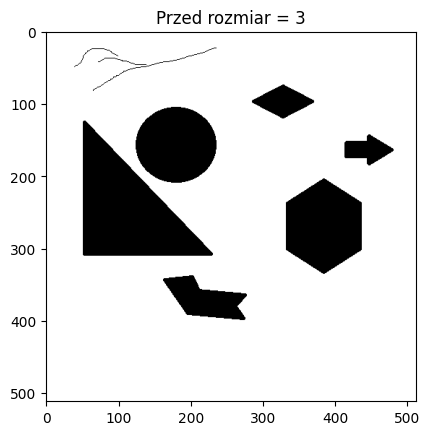

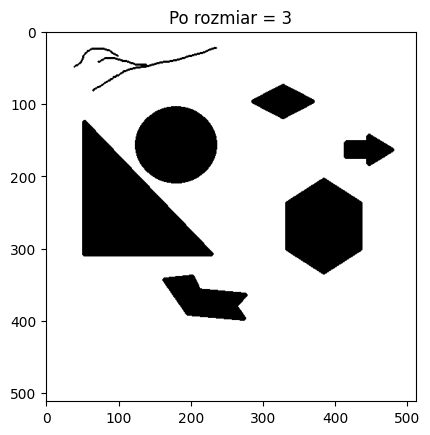

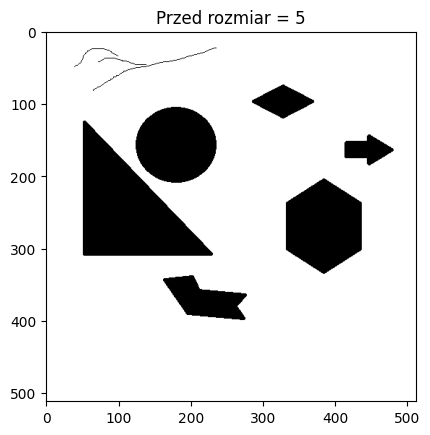

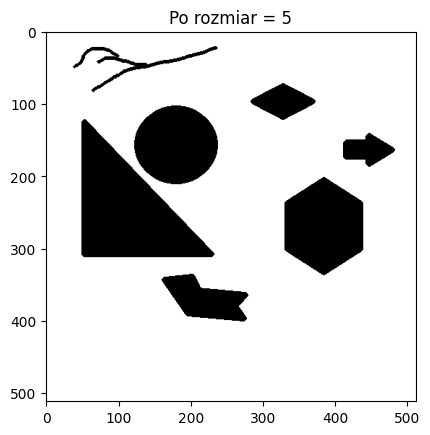

In [19]:
image = cv2.cvtColor(cv2.imread('./img/FIG_512.png'), cv2.COLOR_BGR2YCrCb)
image_binary = cv2.threshold(image[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def erode_and_show(img, kernel):
    plt.figure()
    plt.title(f'Przed rozmiar = {kernel.shape[0]}')
    plt.imshow(img, cmap='gray')
    plt.figure()
    
    res = cv2.erode(img, kernel)
    plt.title(f'Po rozmiar = {kernel.shape[0]}')
    plt.imshow(res, cmap='gray')
    
kernel_small = np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
kernel_big = np.array([[0,0,1,0,0], [0,1,1,1,0], [1,1,1,1,1], [0,1,1,1,0], [0,0,1,0,0]], dtype=np.uint8)
erode_and_show(image_binary, kernel_small)
erode_and_show(image_binary, kernel_big)

# Zadanie 2 (1 punkt)

* Proszę dokonać binaryzacji obrazu LENA_512 za pomocą algorytmu Otsu.
* Proszę wykonać erozję na binarnej wersji obrazka z elementami strukturalnymi:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$

$$
\begin{bmatrix} 
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix} 
$$

* Proszę narysować różnice obrazów prze i po erozji (proszę nie pomylić kolejności).

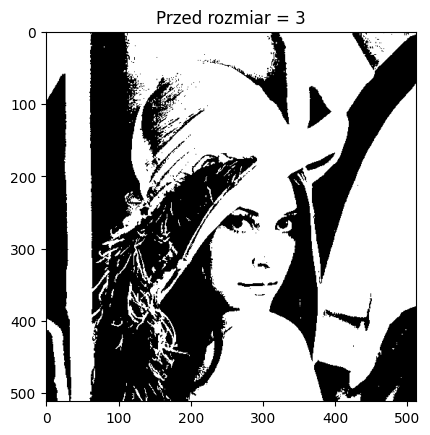

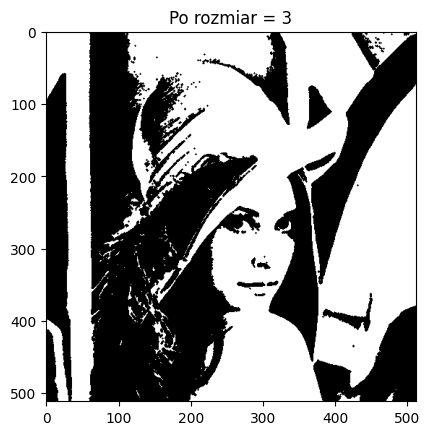

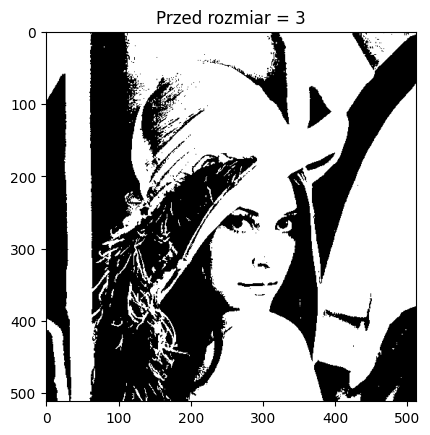

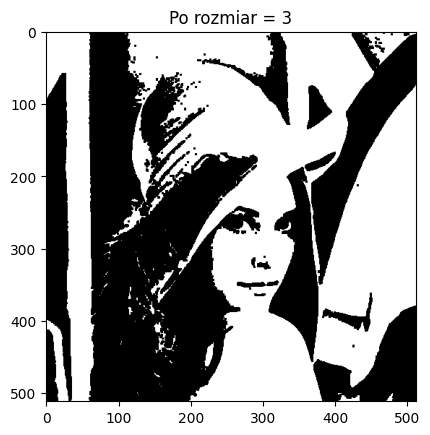

In [20]:
image = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2YCrCb)
image_binary = cv2.threshold(image[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel1 = np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
kernel2 = np.array([[1,1,1], [1,1,1], [1,1,1]], dtype=np.uint8)

erode_and_show(image_binary, kernel1)
erode_and_show(image_binary, kernel2)

# Zadanie 3 (2 punkty)

  * Zdefiniujmy okrągły element strukturalny o promieniu r:
$$
B_r=\{ (x_1,x_2) \in \mathbb{R}^2 \colon x_{1}^2+x_{2}^2<r^2 \}
$$
  * Proszę dokonać binaryzacji obrazu LENA_512 za pomocą algorytmu Otsu, dla $r=2,3,4,5,6,7$

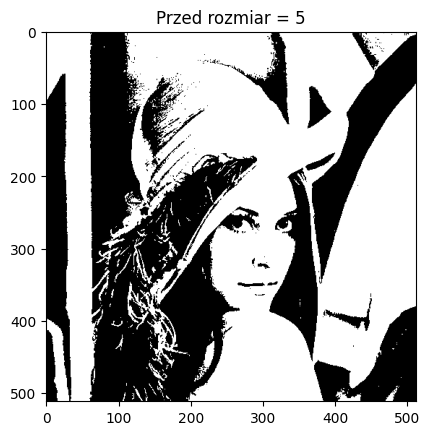

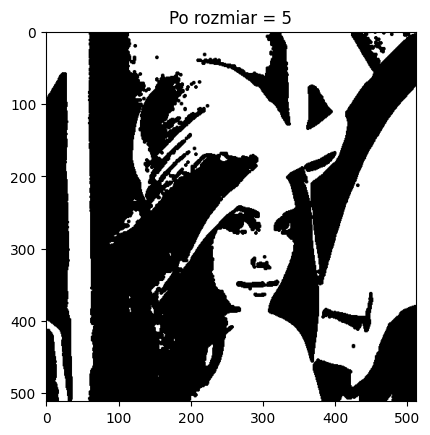

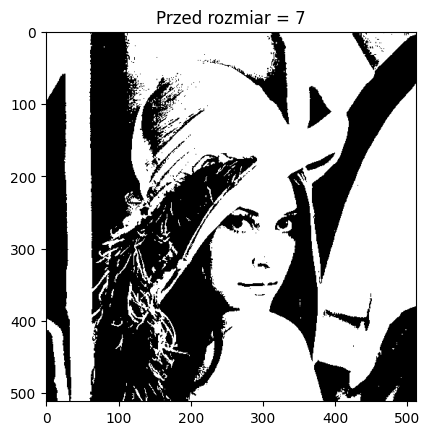

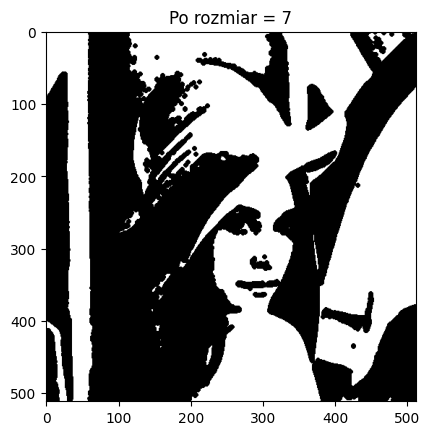

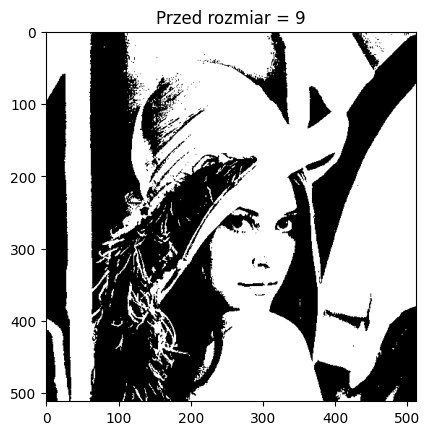

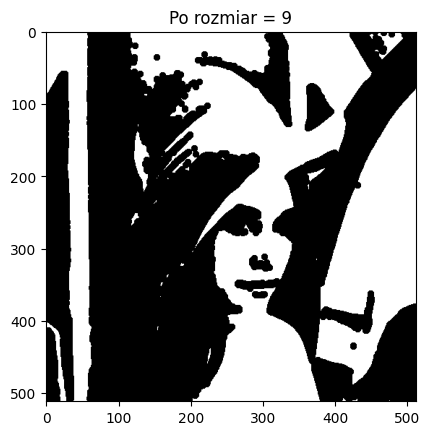

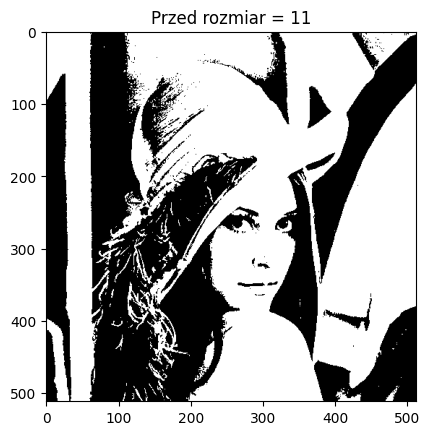

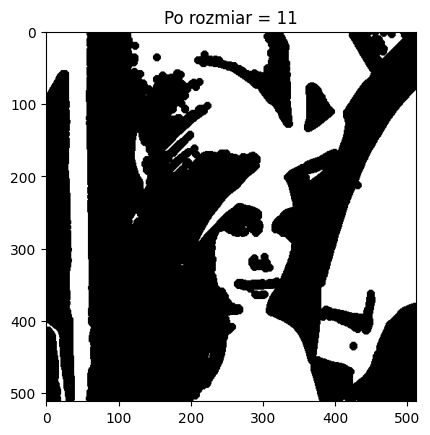

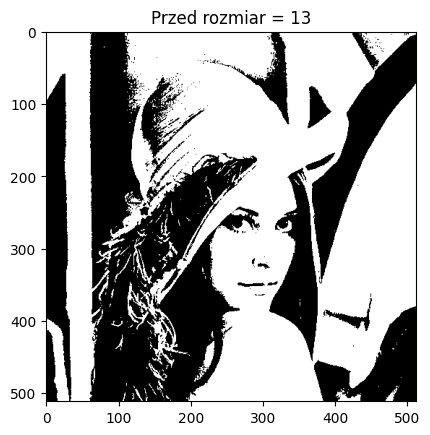

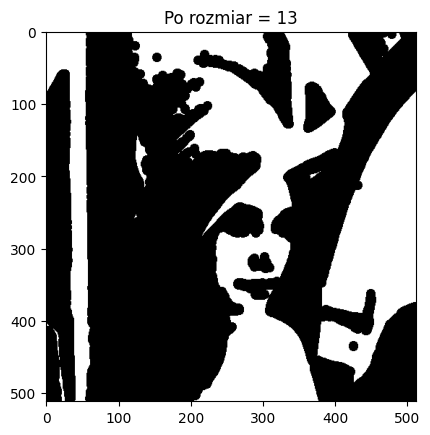

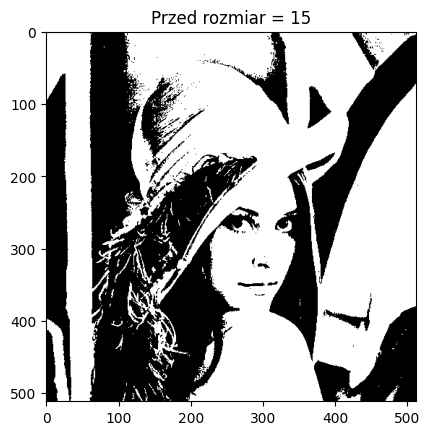

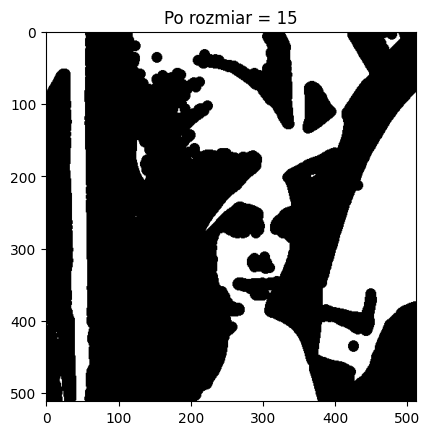

In [53]:
image = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2YCrCb)
image_binary = cv2.threshold(image[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def get_struct_with_r(r):
    ranges = np.arange(-r,r+1)**2
    dists = np.sqrt(ranges[:,None] + ranges)
    return (dists-r<0.5).astype(np.uint8)

for rr in [2,3,4,5,6,7]:
    erode_and_show(image_binary, get_struct_with_r(rr))

# Dylacja

  * Operacja dylacji jest zastosowaniem sumy Minkowskiego do obrazów cyfrowych
  * Pierwszym argumentem jest obraz
  * Drugim element strukturalny
  * Zasada działania:
    * Do każdego piksela obrazu przykłada się element strukturalny (SE) w jego punkcie centralnym
    * Jeśli choć jeden piksel sąsiedztwa przykryty przez SE ma wartość '1', piksel bieżący też przyjmuje wartość '1' (obiektu pierwszoplanowego)


## Zadanie 4 (1 punkt)
Proszę wykonać ćwiczenie 1 dla dylacji.

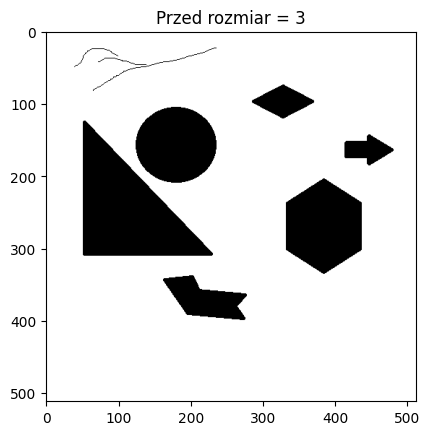

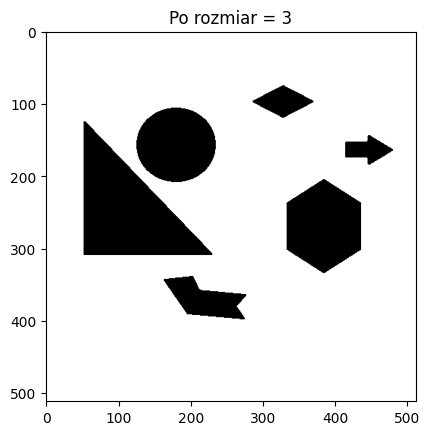

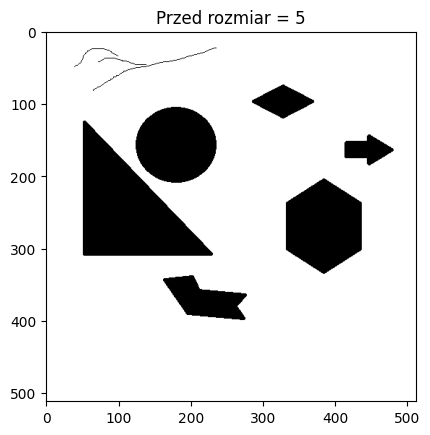

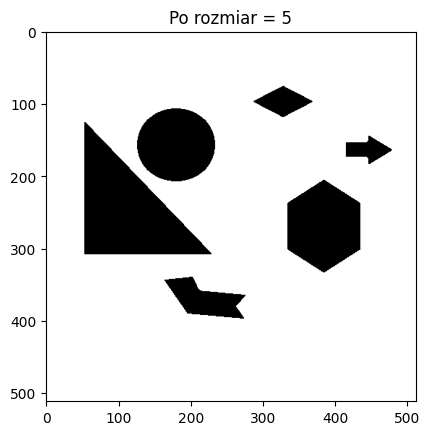

In [54]:
image = cv2.cvtColor(cv2.imread('./img/FIG_512.png'), cv2.COLOR_BGR2YCrCb)
image_binary = cv2.threshold(image[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def dilate_and_show(img, kernel):
    plt.figure()
    plt.title(f'Przed rozmiar = {kernel.shape[0]}')
    plt.imshow(img, cmap='gray')
    plt.figure()
    
    res = cv2.dilate(img, kernel)
    plt.title(f'Po rozmiar = {kernel.shape[0]}')
    plt.imshow(res, cmap='gray')
    
kernel_small = np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
kernel_big = np.array([[0,0,1,0,0], [0,1,1,1,0], [1,1,1,1,1], [0,1,1,1,0], [0,0,1,0,0]], dtype=np.uint8)
dilate_and_show(image_binary, kernel_small)
dilate_and_show(image_binary, kernel_big)

## Zadanie 5 (1 punkt)
Proszę wykonać ćwiczenie 2 dla dylacji.

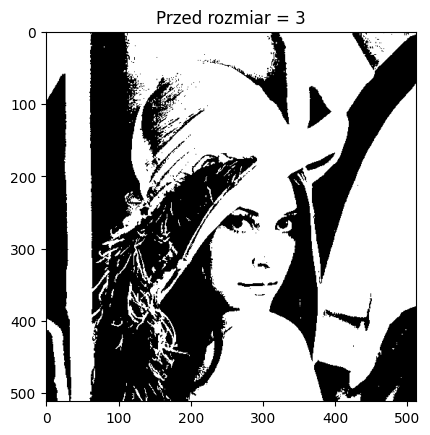

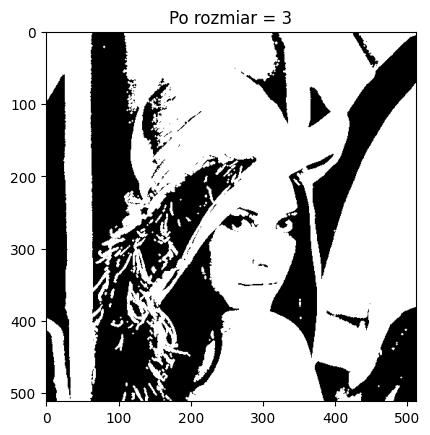

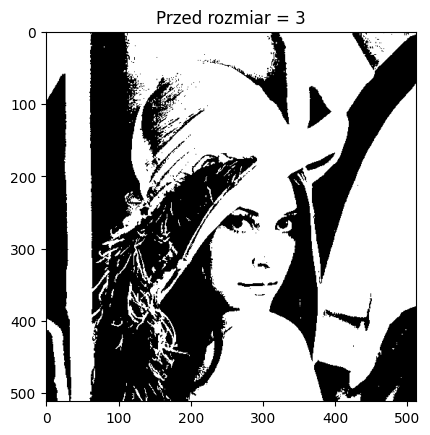

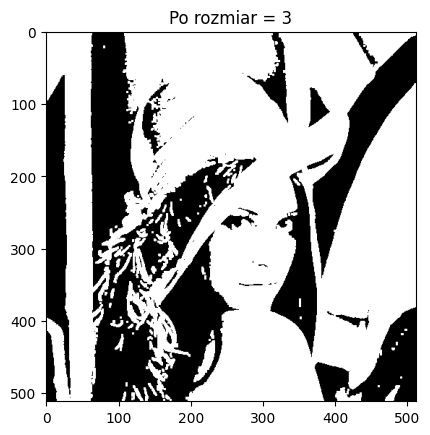

In [55]:
image = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2YCrCb)
image_binary = cv2.threshold(image[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel1 = np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
kernel2 = np.array([[1,1,1], [1,1,1], [1,1,1]], dtype=np.uint8)

dilate_and_show(image_binary, kernel1)
dilate_and_show(image_binary, kernel2)

# Operacja otwarcia i zamknięcia

## Zadanie 6 (1 punkt)
Proszę wykonać operację otwarcia na FIG_512 (najpierw erozja, a potem dylacja), dla okrągłego elementu strukturalnego o promieniach r=2,5,7,20.


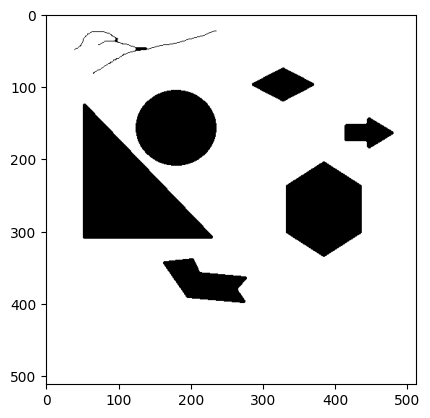

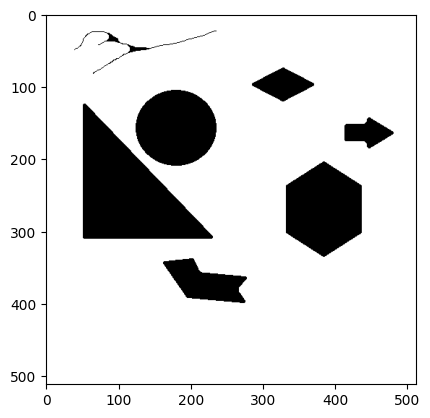

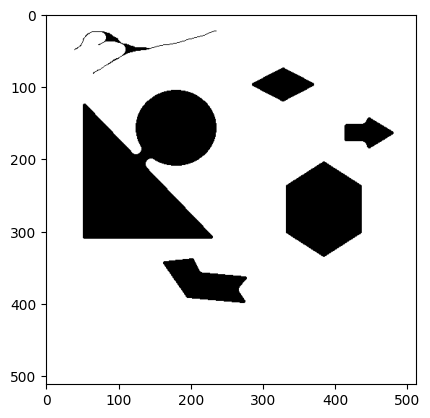

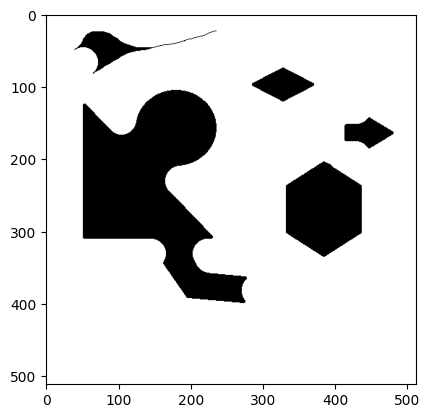

In [56]:
image = cv2.cvtColor(cv2.imread('./img/FIG_512.png'), cv2.COLOR_BGR2YCrCb)
image_binary = cv2.threshold(image[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

for rr in [2,5,7,20]:
    plt.figure()
    kernel = get_struct_with_r(rr)
    res = cv2.dilate(cv2.erode(image_binary, kernel), kernel)
    plt.imshow(res, cmap='gray')

## Zadanie 7 (1 punkt)
Proszę wykonać operację zamknięcia na FIG_512 (najpierw dylacja, potem erozja), dla okrągłego elementu strukturalnego o promieniach r=2,5,7,20.

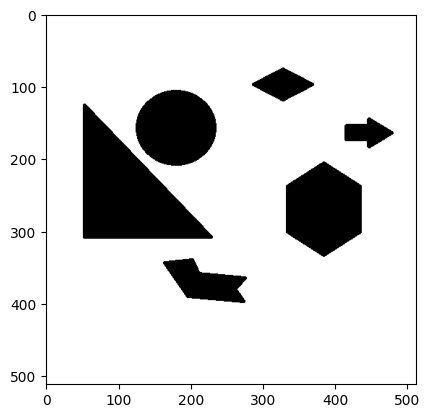

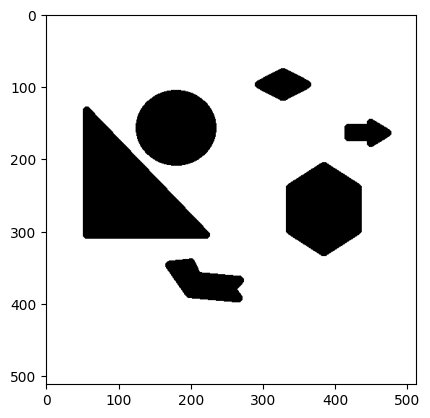

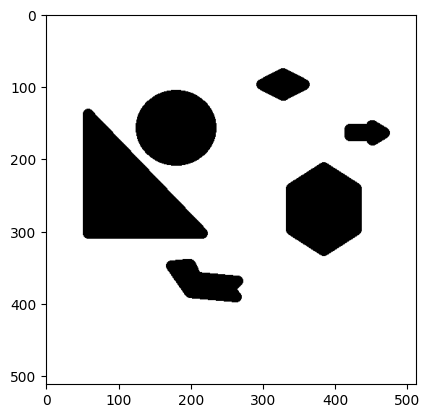

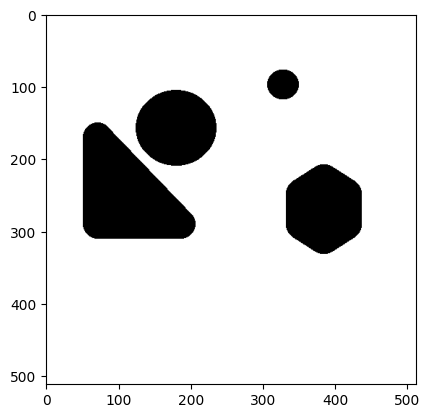

In [57]:
image = cv2.cvtColor(cv2.imread('./img/FIG_512.png'), cv2.COLOR_BGR2YCrCb)
image_binary = cv2.threshold(image[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

for rr in [2,5,7,20]:
    plt.figure()
    kernel = get_struct_with_r(rr)
    res = cv2.erode(cv2.dilate(image_binary, kernel), kernel)
    plt.imshow(res, cmap='gray')

# Erozja i Dylacja RGB

## Erozja dla RGB

$$
L'(m,n)=min_{m_i, n_i \in B(m,n)} (L(m_i,n_i))
$$

## Dylacja dla RGB

$$
L'(m,n)=max_{m_i, n_i \in B(m,n)} (L(m_i,n_i))
$$

## Zadanie 8 (2 punkty)
Proszę wykonać erozję i dylatacją na obrazie Leny (format RGB) z elementami strukturalnym:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$



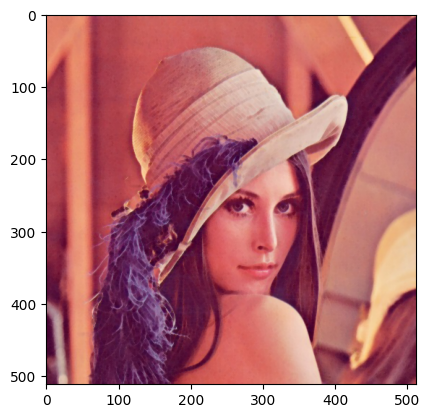

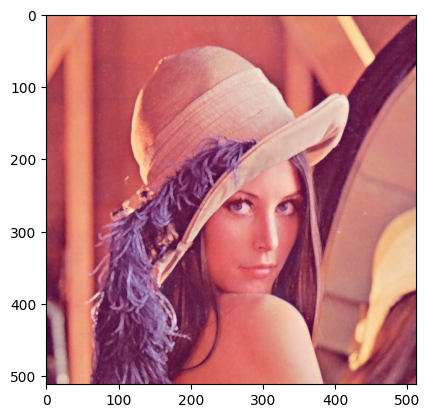

In [58]:
image = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2RGB)
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)

eroded = cv2.erode(image, kernel)
dilated = cv2.dilate(image, kernel)

plt.figure()
plt.imshow(eroded)
plt.figure()
plt.imshow(dilated)